# Shape Mode Decomposition-Batch Analysis

Decompose the filament shape into shape modes using Principle-Component-Analysis (Eigenvalue decomposition)

Results:
- Filament shape modes
- Mode amplitude of the filament for each shape mode vs time
- No:of Eigenvalues needed to explain ~95% of the variance in filament shapes.

In [10]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

In [13]:
batch_data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/Analysis_test'
data_folders = os.listdir(batch_data_folder)

print(len(data_folders))

4


  0%|          | 0/4 [00:00<?, ?it/s]

No:of spatial points: 100
No:of time points: 37501
(37501, 100)
(37501, 100)
No:of eigenvalues to explain 95 perc of variance: 3


<IPython.core.display.Javascript object>


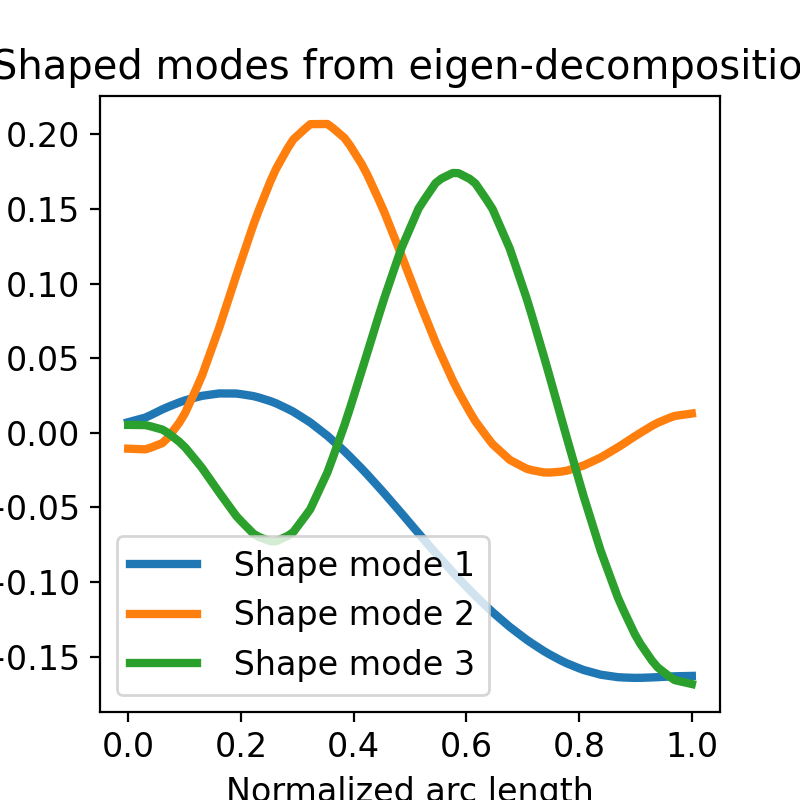

 25%|██▌       | 1/4 [00:03<00:11,  3.79s/it]

No:of spatial points: 100
No:of time points: 37501
(37501, 100)
(37501, 100)
No:of eigenvalues to explain 95 perc of variance: 3


<IPython.core.display.Javascript object>


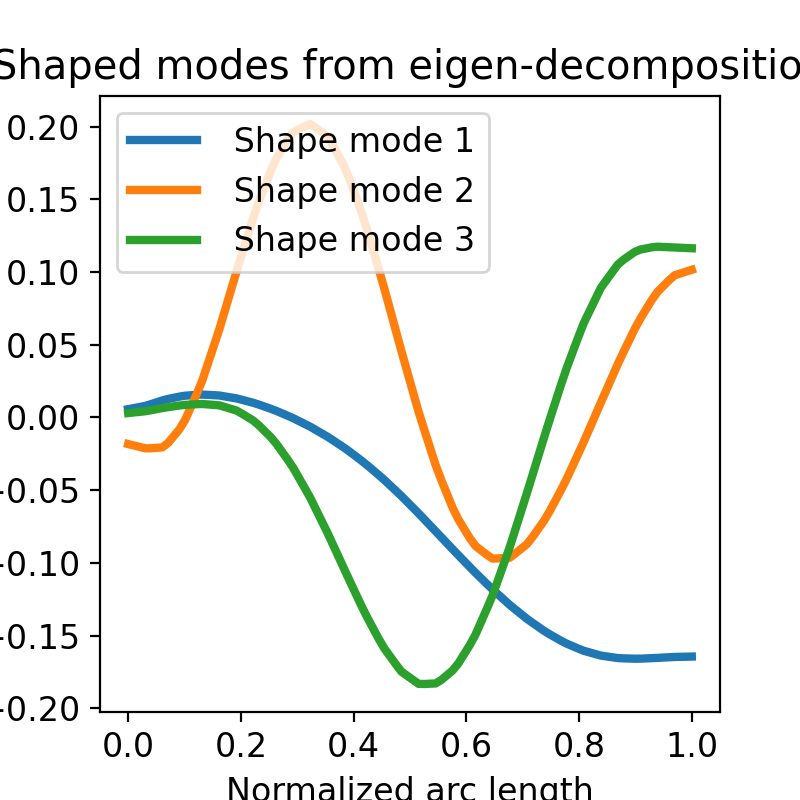

 50%|█████     | 2/4 [00:07<00:07,  3.75s/it]

No:of spatial points: 100
No:of time points: 37501
(37501, 100)
(37501, 100)
No:of eigenvalues to explain 95 perc of variance: 3


<IPython.core.display.Javascript object>


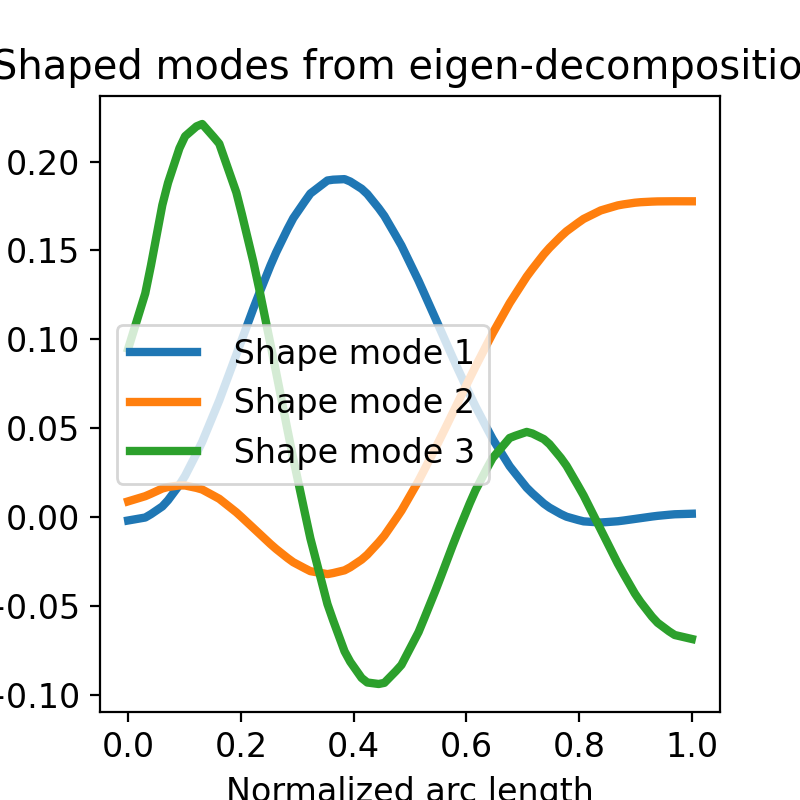

 75%|███████▌  | 3/4 [00:11<00:03,  3.75s/it]

No:of spatial points: 100
No:of time points: 37501
(37501, 100)
(37501, 100)
No:of eigenvalues to explain 95 perc of variance: 5


<IPython.core.display.Javascript object>


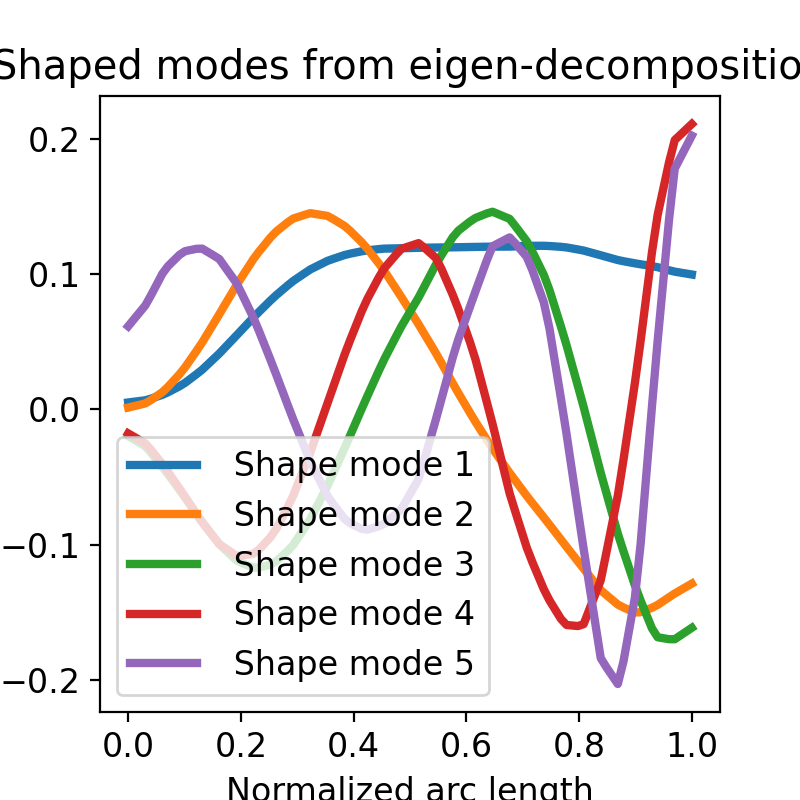

100%|██████████| 4/4 [00:15<00:00,  3.81s/it]


In [15]:
# Batch analysis

plt.close('all')
for folder in tqdm(data_folders):
    
    cwd = os.path.join(batch_data_folder, folder)
    
    found_completed_sim = False
    
    files = [file for file in os.listdir(cwd) if file.endswith('.hdf5')]
    while found_completed_sim == False:
        
        for file in files:
            
            full_path = os.path.join(batch_data_folder, folder, file)
            
            fil = analysis.analysisTools(file = full_path)
            
            ic_analysis_folder = os.path.join(fil.rootFolder, 'IC_analysis')
    
            fil.ic_analysis_folder = ic_analysis_folder
            
            if(fil.Time[-1]==500*fil.activity_timescale):
                # Completed simulation found.
                # Run the PCA analysis
                
                # Compute tangent angle matrix
                fil.compute_tangent_angle_matrix()
                
                # Compute the shape Covraiance matrix
                fil.compute_shape_covariance_matrix()
                
                # Eigen-decomposition of the covraiance matrix
                d_sig, eigenvectors_sig, d_normalized =\
                fil.matrix_eigen_decomposition(matrix = fil.covariance_matrix)
                
                
                # Save the no:of eigvalues necessary to explain 95% of variance to file
                fil.save_eigenvectors()
                
                fil.plot_shape_modes(save = True)
                fil.project_filament_shapes()
                fil.save_mode_amplitudes()
                
                
                found_completed_sim = True
                
                break
                
        if(found_completed_sim==False):
            # After looking through all the files if we find no compleetd sim. 
            print('No completed simulation found for this parameter-value')
            break